### Sprawozdanie - Minimalizacja funkcji
<div style="text-align: right"> Wojciech Kosztyła </div>


#### Zadanie 1 - Problem komiwojażera

Wygeneruj chmurę $n$ losowych punktów w 2D, a następnie zastosuj algorytm symulowanego wyżarzania
 do przybliżonego rozwiązania problemu komiwojażera dla tych punktów.

<br>

1. Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości $n$ oraz 3 różnych układów punktów w 2D
 - rozkład jednostajny,
 - rozkład normalny z czterema różnymi grupami parametrów,
 - dziewięc odseparowanych grup punktów).

<br>

2. Zbadaj wpływ sposobu generacji sąsiedniego stanu

 - <center>*consecutive swap* - zamiana kolejności losowej pary połączonych wierzchołków w ścieżce</center>

 <center>vs.</center>

 - <center>*arbitrary swap* - zamiana dwóch losowych wierzchołków w ścieżce)</center>

  oraz początkowej wartości temperatury na zbieżność procesu optymalizacji.

<br>

3. Przedstaw wizualizację działania procedury minimalizującej funkcję celu (funkcja przekazana do metody dual_annealing może modyfikować zewnętrzny stan)


___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import shuffle

Rozpocznę od stworzenia "chmury" losowych punktów w 2D.

In [2]:
def stworz_chmure(tryb, n):
    punkty = []

    if tryb == "rozklad_jednostajny":
        for i in range(n):
            wylosowana_kropka = np.random.uniform(-10.0, 10.0, size=2)
            punkty.append(wylosowana_kropka)


    elif tryb == "rozklad_normalny":    ## z podziałem na 4 parametry

        ilosc_parametrow = 4

        wartosc_oczekiwana = np.random.uniform(-10.0, 10.0, ilosc_parametrow)
        odchylenie_standardowe = np.random.uniform(0.68, 4.0, ilosc_parametrow)

        for i in range(ilosc_parametrow):
            poczatek_przedzialu = int( np.floor(i * n / ilosc_parametrow) )
            koniec_przedzialu   = int( np.floor((i+1) * n / ilosc_parametrow) - 1 )

            iterator = poczatek_przedzialu
            while iterator <= koniec_przedzialu:

                wylosowana_kropka = np.random.normal(loc=wartosc_oczekiwana[i], scale=odchylenie_standardowe[i], size=2)
                punkty.append(wylosowana_kropka)

                iterator += 1


    else:   ## dziewięć odseparowanych grup punktów
        for i in range(9):
            poczatek_przedzialu = int( np.floor(i * n / 9) )
            koniec_przedzialu   = int( np.floor((i+1) * n / 9) - 1 )

            r = 5       # grupy rozkładam na kole o promieniu r
            kat = (i / 9) * (2 * np.pi)
            standardowy_x = r * np.cos(kat)     # punkt, wokół którego rozkładam grupę
            standardowy_y = r * np.sin(kat)

            iterator = poczatek_przedzialu
            while iterator <= koniec_przedzialu:

                wylosowana_kropka = np.random.uniform(-1.0, 1.0, size=2)
                wylosowana_kropka[0] += standardowy_x
                wylosowana_kropka[1] += standardowy_y
                punkty.append(wylosowana_kropka)

                iterator += 1

    shuffle(punkty)
    return punkty

Tworzenie dla:

<br>

>  - rozkład jednostajny,

Sprowadziło się do najzwyklejszego pobierania $n$ liczb z `numpy.random.uniform`.

<br>

>  - rozkład normalny z czterema różnymi grupami parametrów,

Najpierw wylosowałem losowe wartości parametrów dla rozkładu normalnego.

Następnie utworzyłem wzór, dzielący ciąg $n$ liczb na równe przedziały (aby dla każdej pary parametrów przypasować taką samą ilość losowanych liczb).

Na przedziale $[poczatek przedzialu, koniecprzedzialu]$ losowałem odpowiednie dwójki z `numpy.random.normal`.

<br>

>  - dziewięc odseparowanych grup punktów).

Zamiast losowo ustawiać grupy punktów, postanowiłem ustawić je w kontrolowalny sposób - na okręgu.
Losowe ustawienie nie gwarantowałoby "separacji".

Dzielenie przedziału wykonałem jak w poprzednim podpunkcie.

Do wylosowanej wartości z rozkładu jednostajnego dodawałem koordynaty "punktu na okręgu".

___

Spróbowałem wykonać tą funkcję:

In [3]:
print( stworz_chmure("rozklad_jednostajny", 28) )

[array([3.28063543, 2.56391209]), array([ 8.89174384, -9.85651579]), array([ 5.55968772, -6.25359494]), array([5.09343655, 4.53724801]), array([-3.66985235, -5.25559301]), array([-0.4288251 ,  5.11321255]), array([-6.41197024,  9.13619611]), array([-4.32246625,  0.46701471]), array([-0.18239989, -7.80491518]), array([1.74239807, 0.79164277]), array([ 2.59558294, -5.13763209]), array([-5.76387378, -6.84295232]), array([ 3.00730566, -2.14891785]), array([-1.96763509, -9.5062726 ]), array([-2.15938215, -7.07409194]), array([7.14798776, 6.76501764]), array([ 7.00350639, -8.95176481]), array([ 5.42059397, -1.95601998]), array([1.90237206, 2.9630487 ]), array([-4.15893958, -0.96046938]), array([-1.22328484,  2.22759701]), array([-0.62646234,  2.79466437]), array([0.37768622, 5.4397613 ]), array([ 5.73056565, -6.52762529]), array([-9.48876311,  2.58592794]), array([ 5.98349627, -1.04066142]), array([-7.35177359,  6.4811531 ]), array([-0.46824928,  5.67472912])]


In [4]:
print( stworz_chmure("rozklad_normalny",  28) )

[array([-3.02023117, -2.56064839]), array([-0.64768038,  7.04283585]), array([-6.43734301, -7.52564377]), array([8.05366201, 6.00397154]), array([6.47771346, 7.83604426]), array([-3.86926453, -3.39341669]), array([3.60359164, 4.73365336]), array([5.31210036, 4.52010869]), array([-4.56072104, -5.7523653 ]), array([1.30250476, 3.57649415]), array([-3.77866037, -3.25660263]), array([6.17400595, 4.57575396]), array([-2.36499786, -6.08586036]), array([-3.75267887,  0.17026743]), array([3.65426788, 5.32028674]), array([5.82647608, 5.12285515]), array([6.26759518, 5.9991051 ]), array([5.54111237, 3.04162685]), array([-3.82014749, -1.16552193]), array([-8.57660479, -3.5557323 ]), array([-1.85641277, -0.72225152]), array([-6.41656353, -9.23277812]), array([-4.26446644, -4.49493917]), array([3.32039222, 5.76191457]), array([-3.50620793, -3.61852657]), array([-4.87557249, -3.28559985]), array([4.34199674, 3.38694514]), array([4.63396045, 6.29462458])]


In [5]:
print( stworz_chmure("separacja", 28) )


[array([-3.23399974, -3.43814531]), array([2.92388753, 3.78865674]), array([-4.21167858, -2.4256891 ]), array([-4.68616927,  2.46136115]), array([1.81533683, 5.17434647]), array([-3.91742356, -2.08441259]), array([ 0.70567513, -5.92373231]), array([ 4.08457208, -2.6556313 ]), array([5.39247503, 0.84519855]), array([-4.33423732,  0.95521175]), array([ 4.66564812, -2.67488636]), array([ 4.23875004, -3.87823659]), array([5.10290239, 0.51167311]), array([-4.2349975 , -1.69622388]), array([-4.72887154,  2.39353466]), array([ 4.30060416, -0.07408405]), array([3.16827102, 4.14391283]), array([-1.72892358,  3.35625447]), array([-2.92608231,  4.41583532]), array([-1.73420955, -4.12457912]), array([ 4.6543546 , -3.13998504]), array([-3.21984241,  3.7901705 ]), array([ 0.72062191, -4.46410274]), array([1.12703375, 4.25190691]), array([-3.4059467 , -4.94367378]), array([ 0.84697243, -4.92591575]), array([3.4832365 , 3.13440154]), array([1.0619325 , 5.35372302])]


Jak widzimy, dane w takiej postaci nie pozwalają nam stwierdzić, czy losowanie spełnia podane założenia.
___
Zaimplementuję więc wyświetlanie takich list macierzy.

In [6]:
def wyswietl_chmure(chmura, tytul="Chmura punktów"):
    fig1, axis = plt.subplots(figsize=(10,10))

    axis.set_title(tytul)
    axis.set_xlabel("x")
    axis.set_ylabel("y")

    for punkt in chmura:
        axis.scatter(punkt[0], punkt[1])

    fig1.tight_layout()
    #fig1.show()

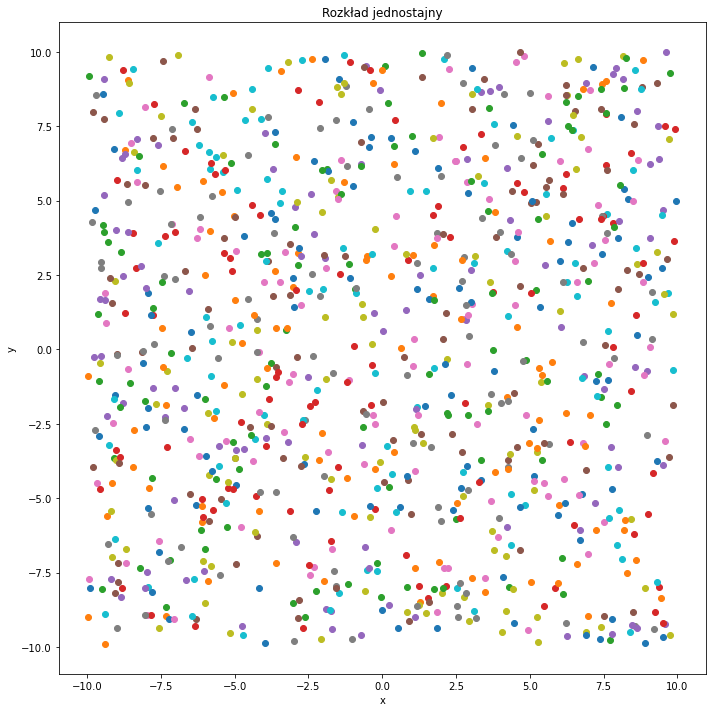

In [7]:
wyswietl_chmure( stworz_chmure("rozklad_jednostajny", 1000) , tytul="Rozkład jednostajny")

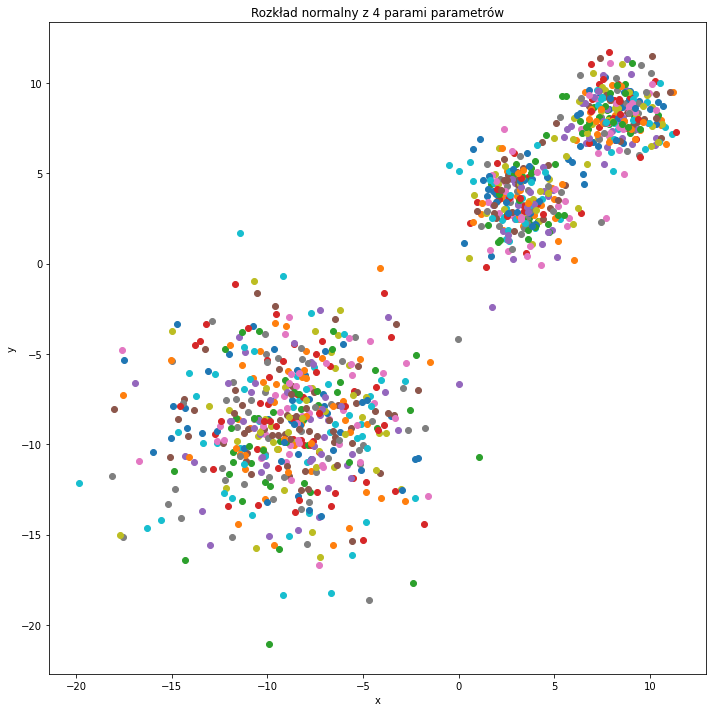

In [8]:
wyswietl_chmure( stworz_chmure("rozklad_normalny", 1000) , tytul="Rozkład normalny z 4 parami parametrów" )

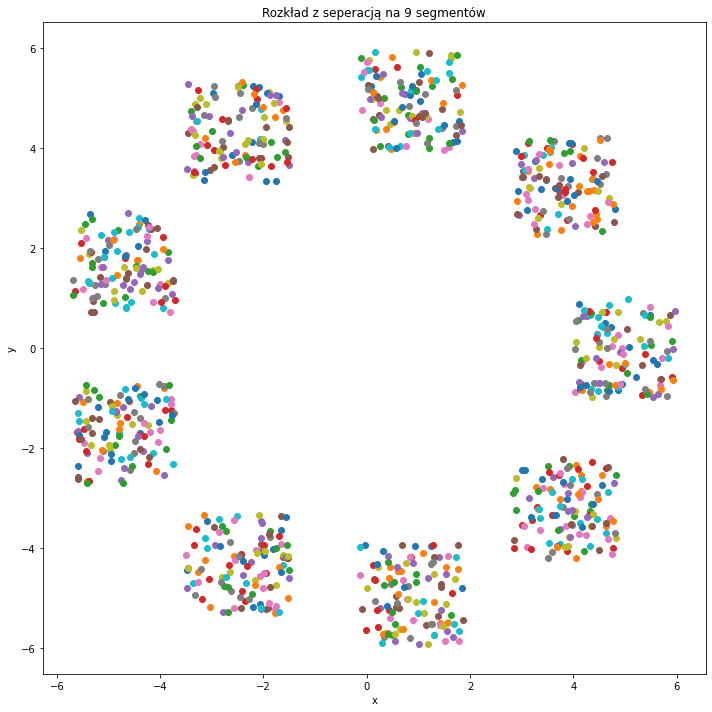

In [9]:
wyswietl_chmure( stworz_chmure("separacja", 1000)  , tytul="Rozkład z seperacją na 9 segmentów")


Na takim bezkrawędziowym grafie widzimy, że tworzenie "chmury" wykonywane jest poprawnie.

___

Zaimplementuję teraz własną funkcję wyżarzania.
Skorzystam z pseudokodu znajdującego się na [Wikipedii - Simulated annealing](https://en.wikipedia.org/wiki/Simulated_annealing).


W pseudokodzie wykorzystywane są funkcje:
 - `temperature`
 - $P( E(s), E(s_{new}), T)$
 - `neighbour()`

#### `temperature`:

Wybór funkcji temperatury znacząco wpływa na wyniki szacowania najkrótszej drogi.

Po paru iteracjach wybrałem funkcję podaną w dokumentacji `scipy.optimize.dual_annealing`:

$T_{q_{v}}(t) = T_{q_{v}}(1) \frac{2^{q_{v}-1} -1}{(1+t)^{q_{v}-1}-1}$ ,

gdzie $T_{q_{v}}(1)$ traktuję jako zmienną globalną w programie.

In [10]:
T_1 = 5230

In [11]:
def temperatura(t):
    q_v = 2.0

    return T_1 * ( 2**(q_v - 1) - 1 ) / ( ( 1 + t )**(q_v - 1) - 1)

#### $P( E(s), E(s_{new}), T)$:

Korzystam z funkcji "acceptance probabilities" używanej przez Kirkpatrick'a:

"if $e'<e$ => $P(...)$ = 1,

else =>  $P(...)$ = $\exp(-(e'-e)/T) $

In [12]:
def P(e, e_prim, T):
    if e_prim < e:
        return 1
    else:
        return np.exp( -(e_prim - e)/T )

#### Energia stanu

W przypadku problemu komiwojażera energia stanu to najzwyczajniej długość wyznaczonej ścieżki.

Korzystam więc z równania $ a^2 + b^2 = c^2 $ do obliczenia odległości między każdymi dwoma miastami w ścieżce, po czym sumuję je wszystkie.

In [13]:
def energia_stanu(stan):
    dlugosc_sciezki = 0

    for id_miasta in range(len(stan) - 1):
        aa = (stan[id_miasta][0] - stan[id_miasta+1][0]) * (stan[id_miasta][0] - stan[id_miasta+1][0])
        bb = (stan[id_miasta][1] - stan[id_miasta+1][1]) * (stan[id_miasta][1] - stan[id_miasta+1][1])
        dlugosc_sciezki += np.sqrt( aa + bb )

    return dlugosc_sciezki


#### `neighbour()`:

Teraz w samej funkcji wyżarzania implementuję dwie opcje:

 "arbitrary swap" (wybór dwóch losowych miast i zamiana ich)

 i

 "consecutive swap" (wybór jednego losowego miasta i zamiana go z jednym z sąsiadujących miast).


In [14]:
def simulatedAnnealing(startowa_sciezka, zmiana="arbitrary swap", k_max=1000):
    obecny_stan = startowa_sciezka

    for k in range(k_max):
        stan_iteracji = obecny_stan.copy()
        T = temperatura( k+1 )

        if zmiana=="arbitrary swap":
            indeks_pierwszego_miasta = np.random.randint(0, len(startowa_sciezka))

            indeks_drugiego_miasta = indeks_pierwszego_miasta
            while(indeks_drugiego_miasta == indeks_pierwszego_miasta):
                indeks_drugiego_miasta = np.random.randint(0, len(startowa_sciezka))

            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]
            
            
        elif zmiana=="consecutive swap":
            indeks_pierwszego_miasta = np.random.randint(1, len(startowa_sciezka) - 1)
            
            if(np.random.uniform(0.0,1.0,1) > 0.5):
                indeks_drugiego_miasta = indeks_pierwszego_miasta + 1
            else:
                indeks_drugiego_miasta = indeks_pierwszego_miasta - 1
                
            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]

        if P(energia_stanu(obecny_stan), energia_stanu(stan_iteracji), T) >= np.random.uniform(0.0, 1.0, 1):
            obecny_stan = stan_iteracji

    return obecny_stan


___
Teraz brakuje nam jedynie funkcji rysującej samą ścieżkę:

In [15]:
def wyswietl_sciezke(chmura, tytul="Sciezka punktów", dlugosc=-1):
    fig1, axis = plt.subplots(figsize=(10,10))

    if dlugosc==-1:
        axis.set_title(tytul)
    else:
        axis.set_title(tytul + " | Długość: " + str(dlugosc))
    axis.set_xlabel("x")
    axis.set_ylabel("y")


    for punkt in chmura:
        axis.scatter(punkt[0], punkt[1])
    chmura=np.array(chmura)
    axis.plot(chmura[:,0], chmura[:,1])

    fig1.tight_layout()
    #fig1.show()

Mogę teraz wykonać ten podpunkt:
> Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości $n$ oraz 3 różnych układów punktów w 2D

In [16]:
temp_w = 10
temp_k = 1000

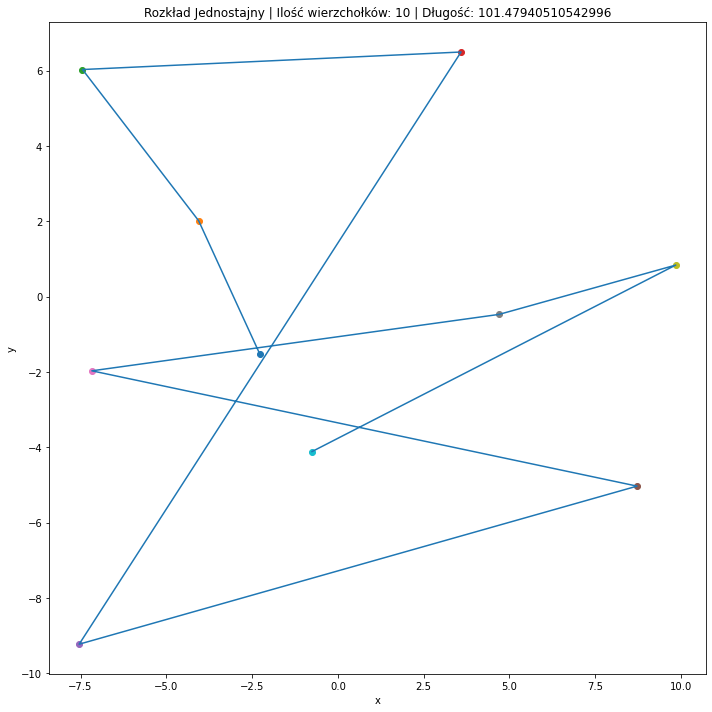

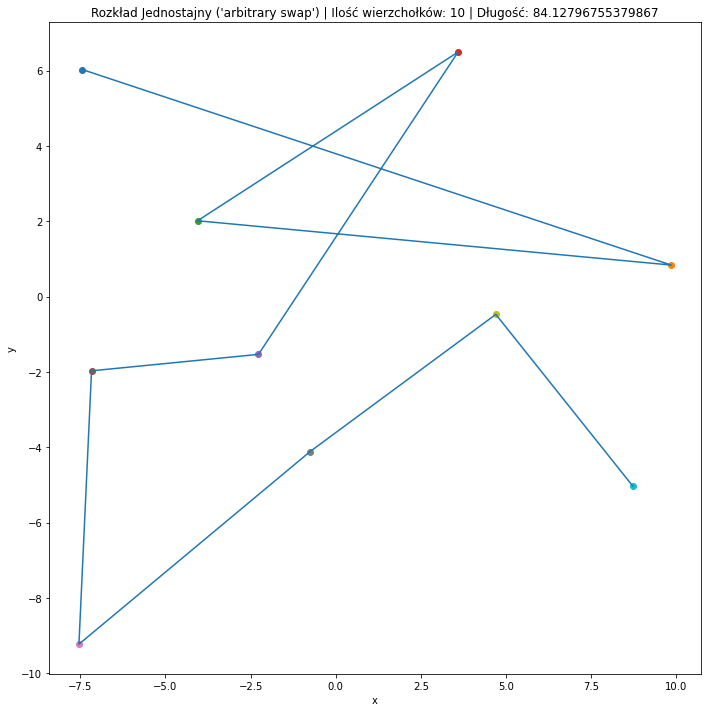

In [17]:
temp_rozklad = "Rozkład Jednostajny"
chmura = stworz_chmure("rozklad_jednostajny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))
nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))

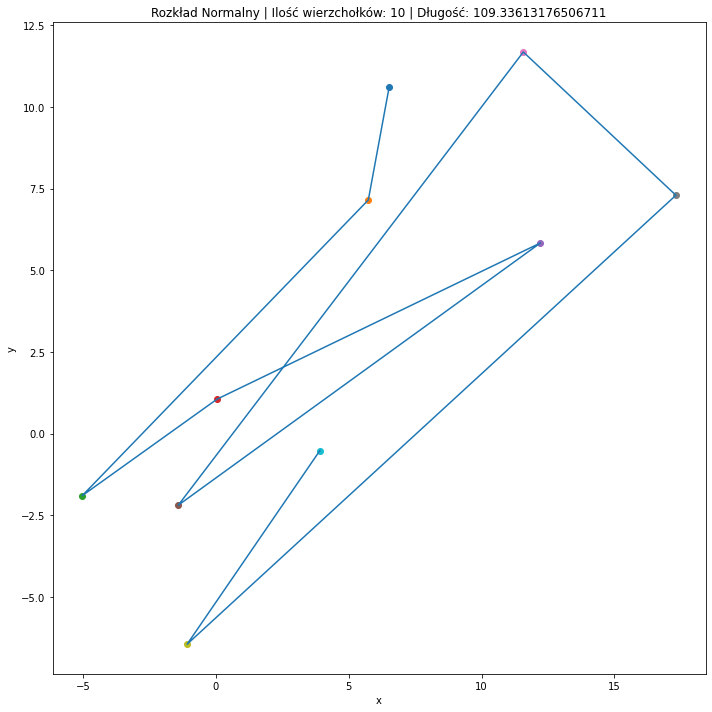

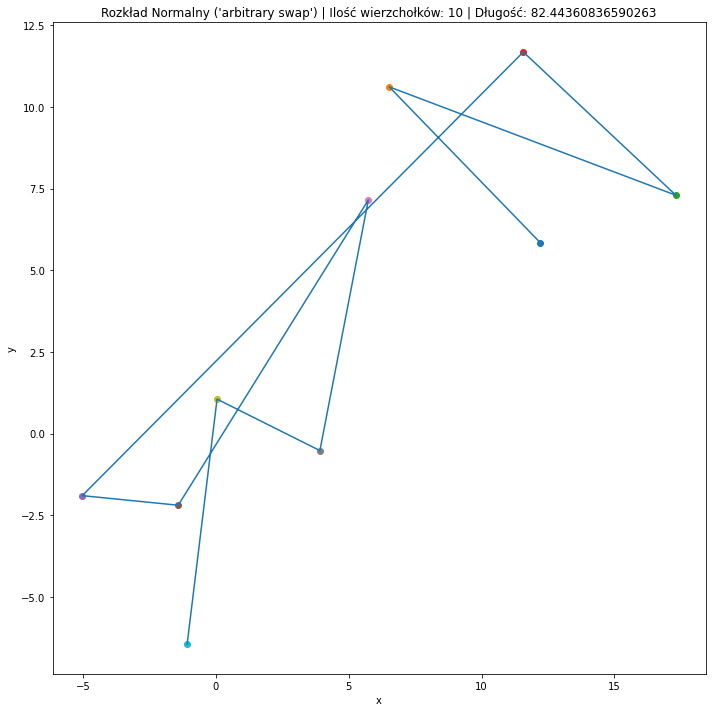

In [18]:
temp_rozklad = "Rozkład Normalny"
chmura = stworz_chmure("rozklad_normalny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))
nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))

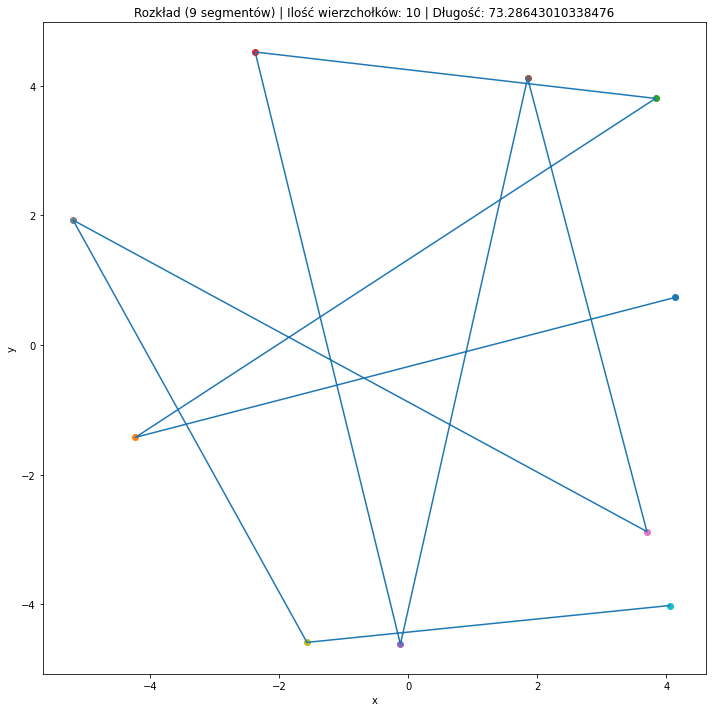

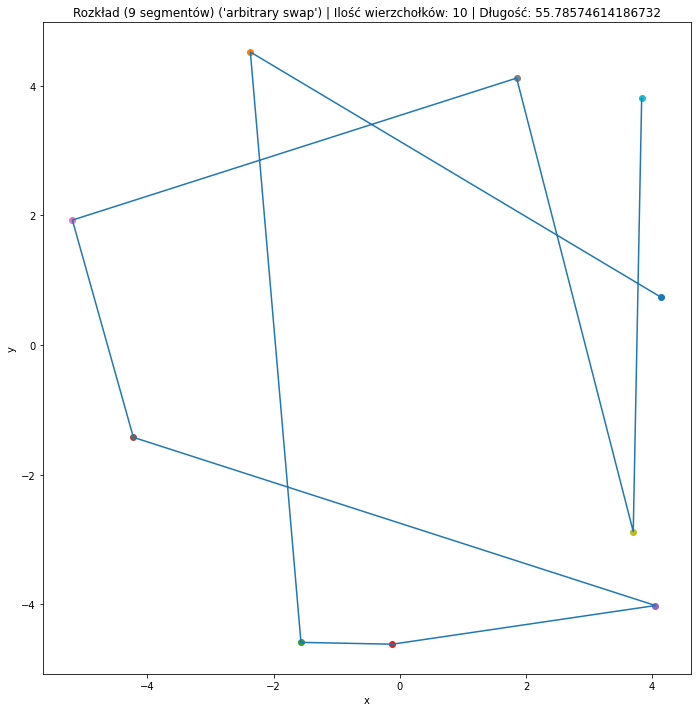

In [19]:
temp_rozklad = "Rozkład (9 segmentów)"
chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))
nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))

In [20]:
temp_w = 25
temp_k = 10000

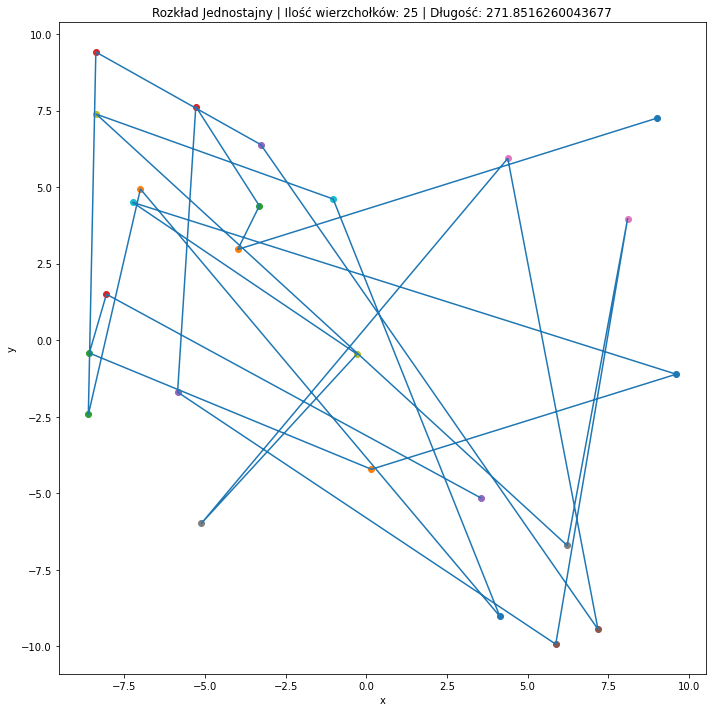

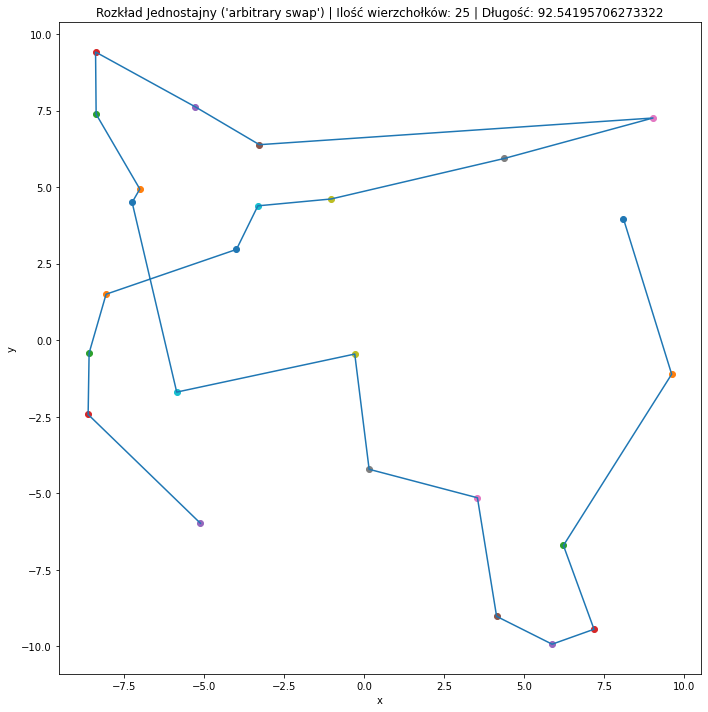

In [21]:
temp_rozklad = "Rozkład Jednostajny"
chmura = stworz_chmure("rozklad_jednostajny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))
nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))

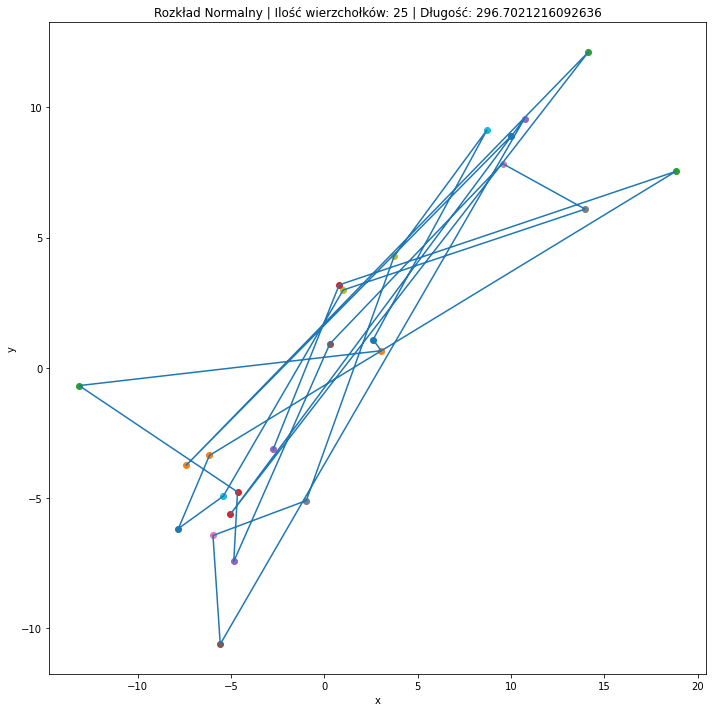

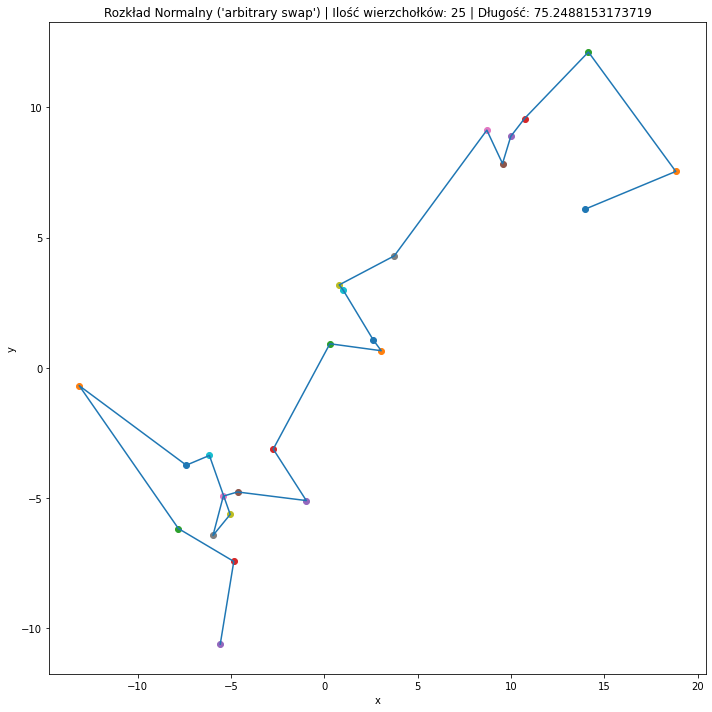

In [22]:
temp_rozklad = "Rozkład Normalny"
chmura = stworz_chmure("rozklad_normalny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))
nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))

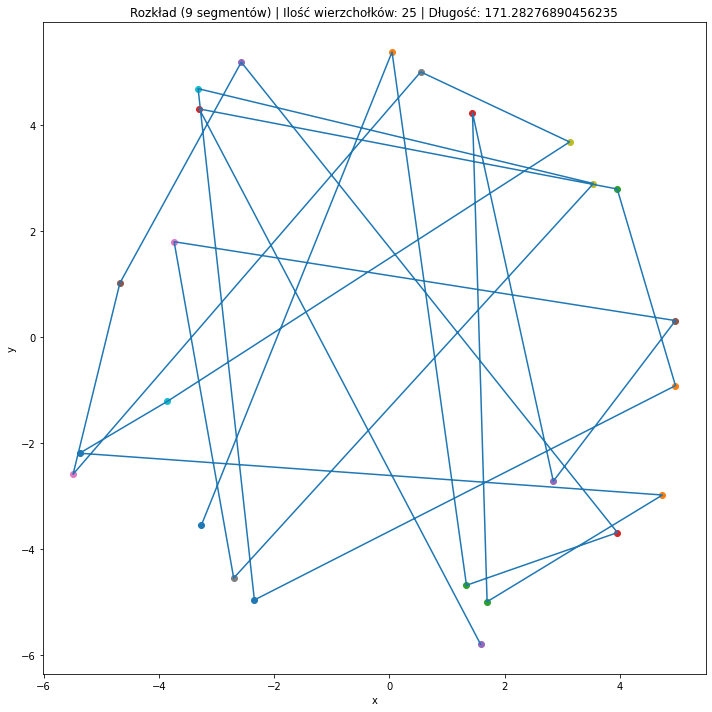

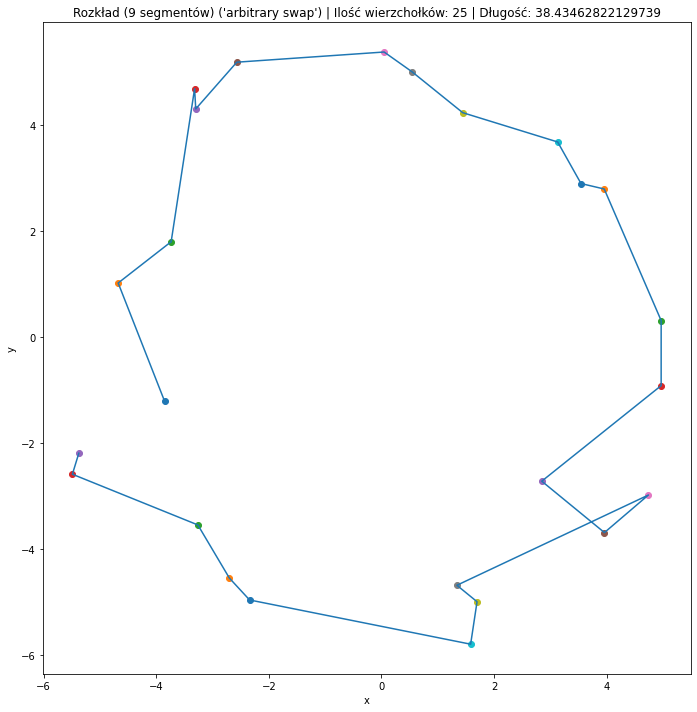

In [23]:
temp_rozklad = "Rozkład (9 segmentów)"
chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))
nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))

In [24]:
temp_w = 50
temp_k = 10000

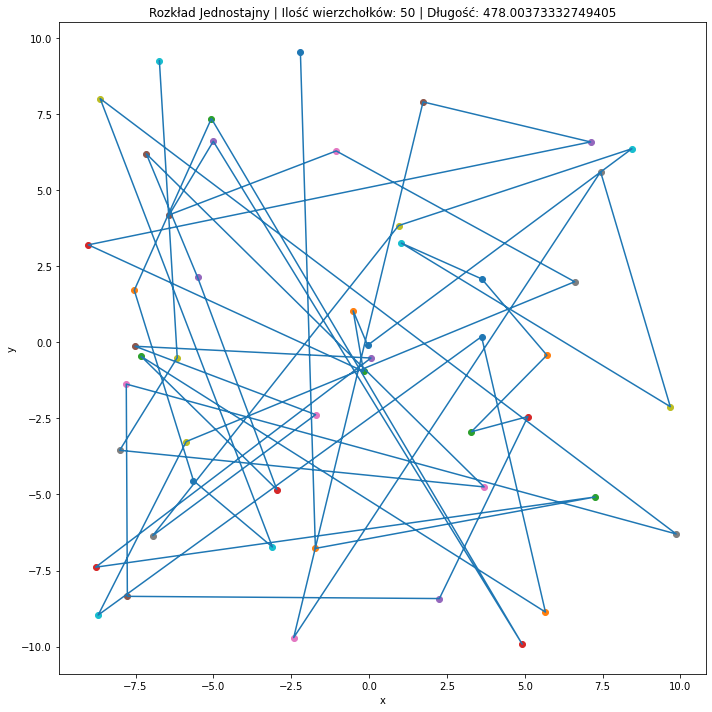

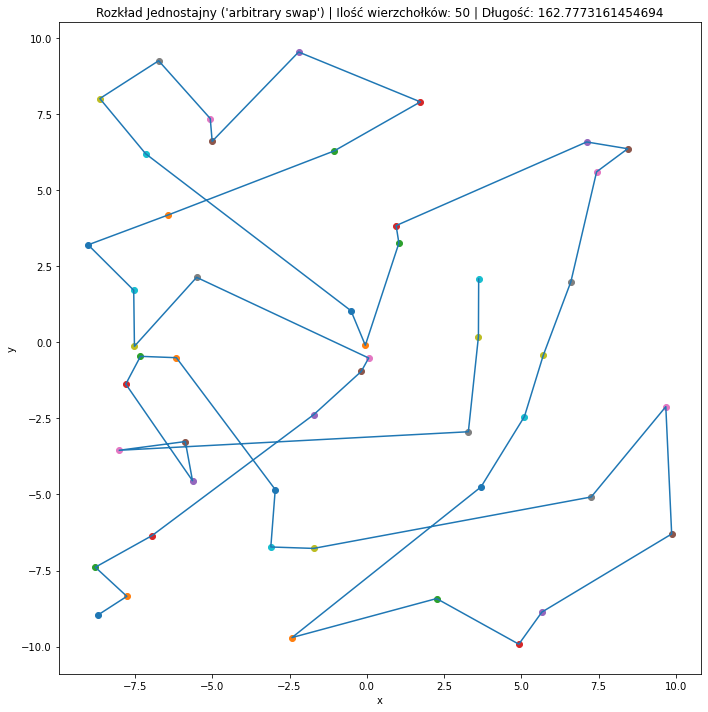

In [25]:
temp_rozklad = "Rozkład Jednostajny"
chmura = stworz_chmure("rozklad_jednostajny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))
nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))

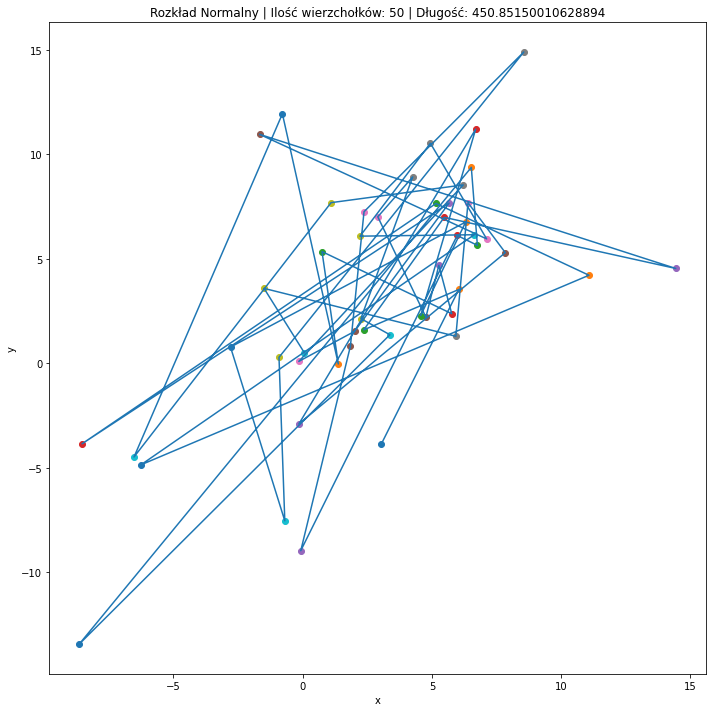

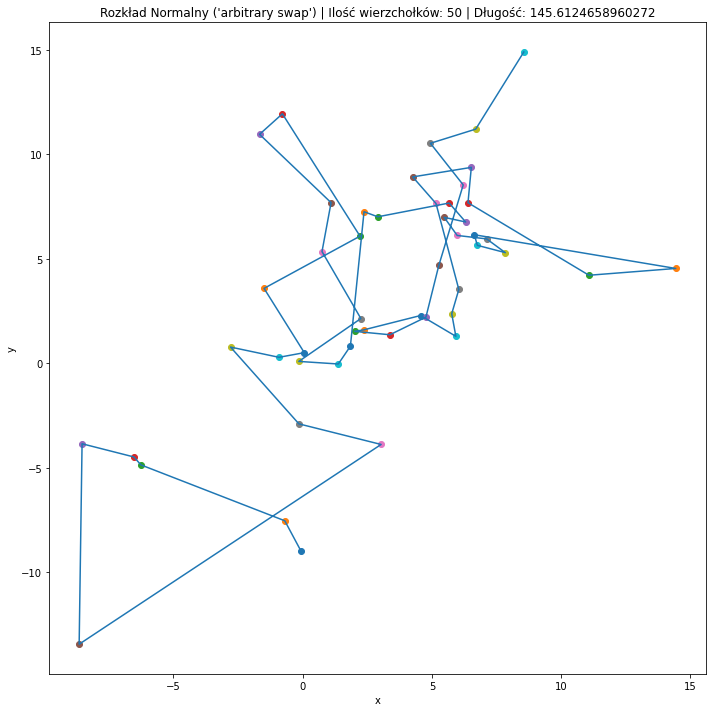

In [26]:
temp_rozklad = "Rozkład Normalny"
chmura = stworz_chmure("rozklad_normalny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))
nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))

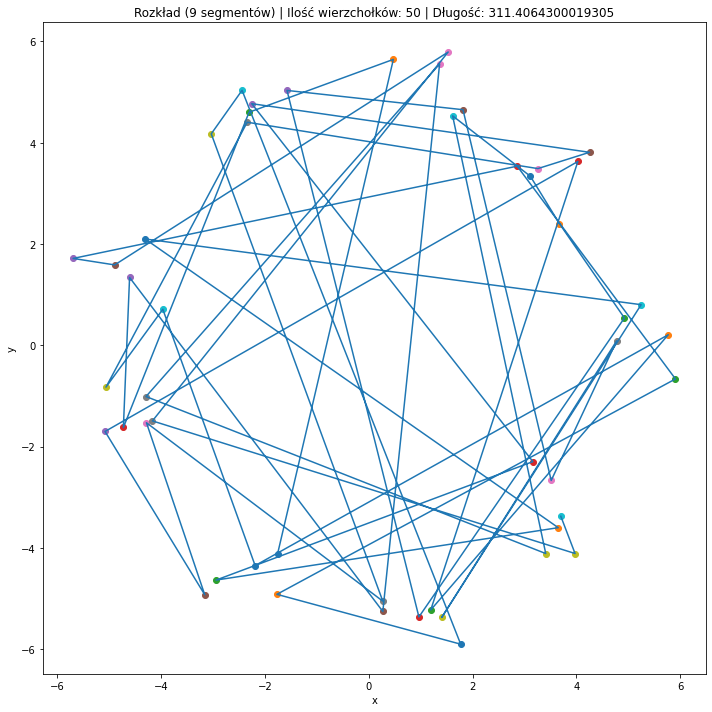

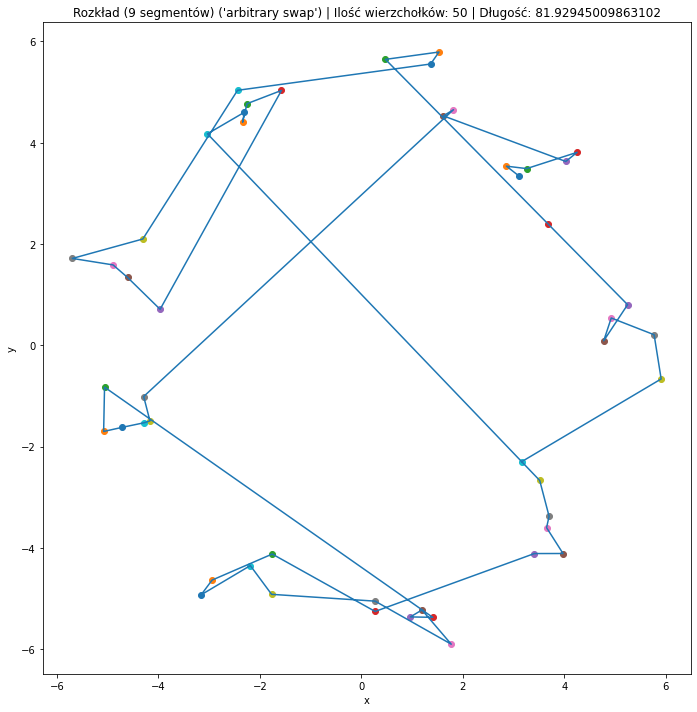

In [27]:
temp_rozklad = "Rozkład (9 segmentów)"
chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))
nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))

___

Teraz wykonam podpunkt:

"Zbadaj wpływ sposobu generacji sąsiedniego stanu oraz początkowej wartości temperatury na zbieżność procesu optymalizacji."

Przechodzę zatem do testów i porównań:

In [28]:
T_1 = 5230
temp_w = 100
temp_k = 25000

#### Rozkład jednostajny

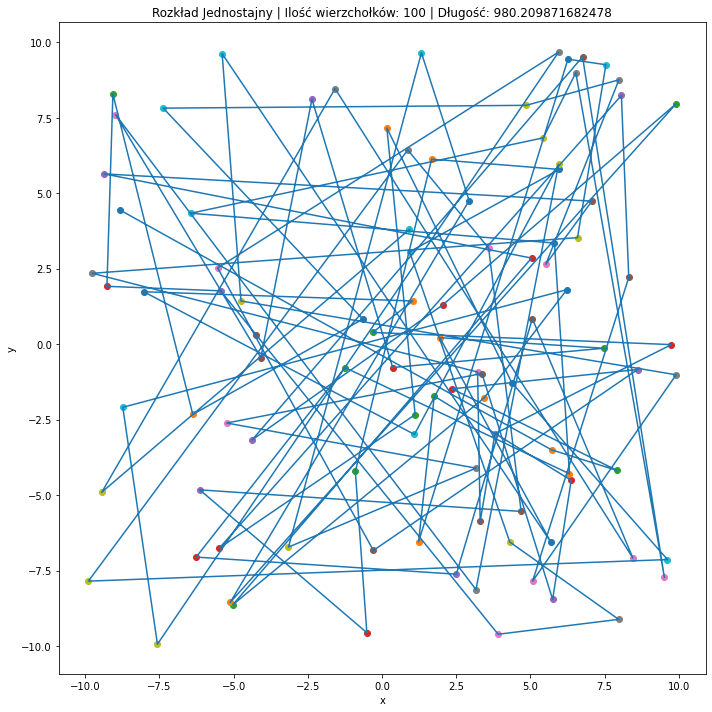

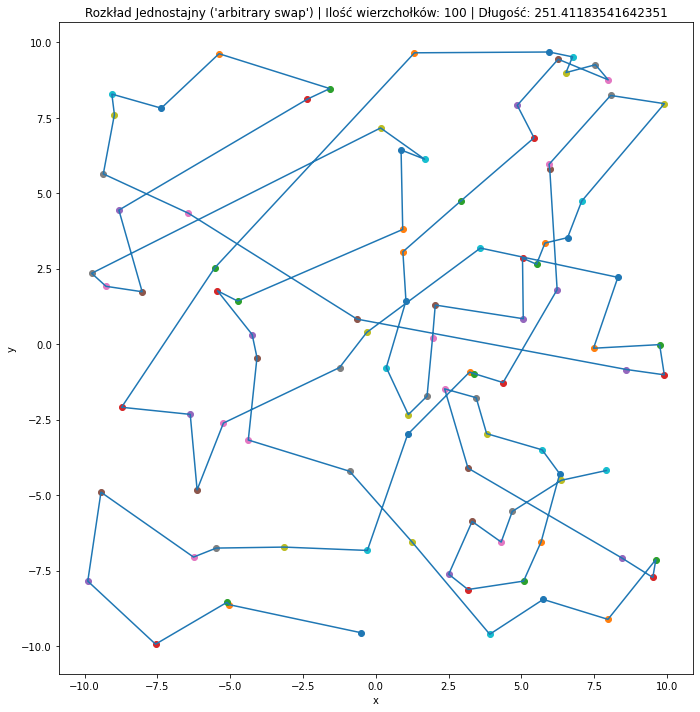

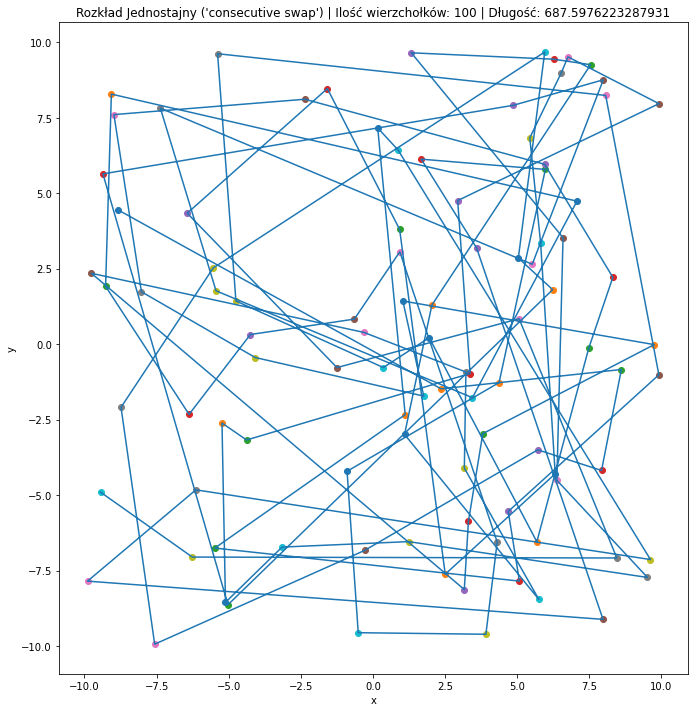

In [29]:
temp_rozklad = "Rozkład Jednostajny"

chmura = stworz_chmure("rozklad_jednostajny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład normalny

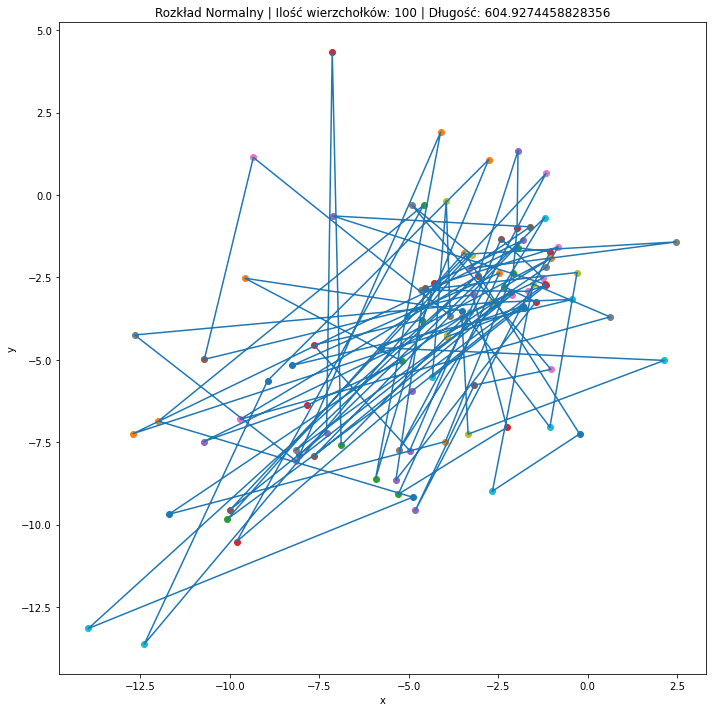

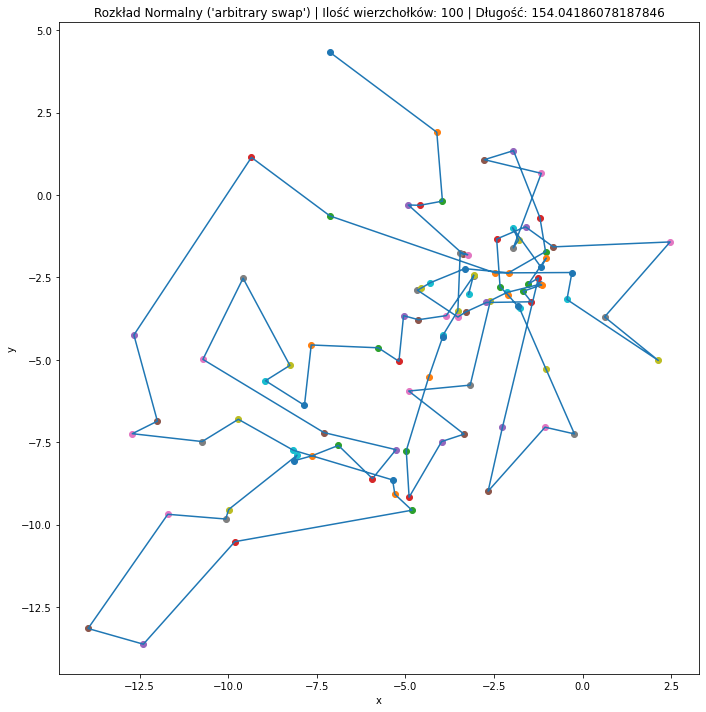

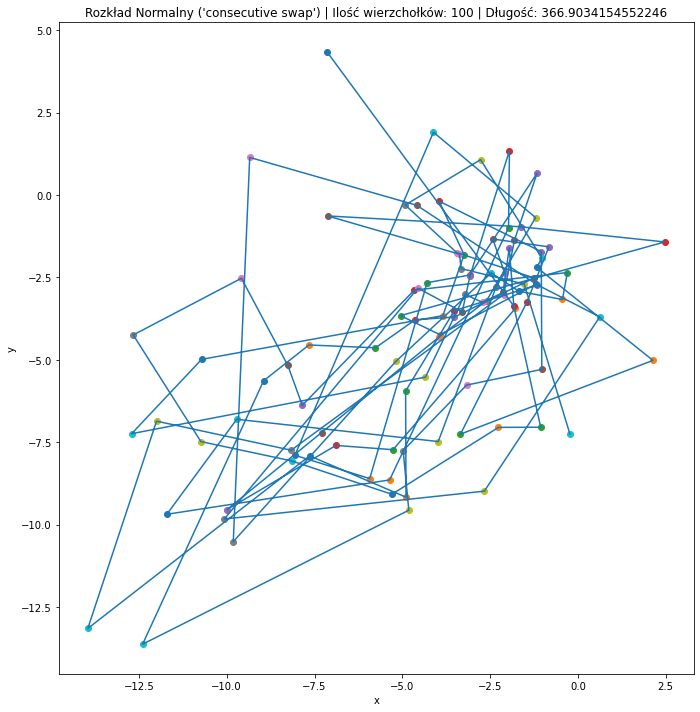

In [30]:
temp_rozklad = "Rozkład Normalny"

chmura = stworz_chmure("rozklad_normalny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład z podziałem na 9 segmentów

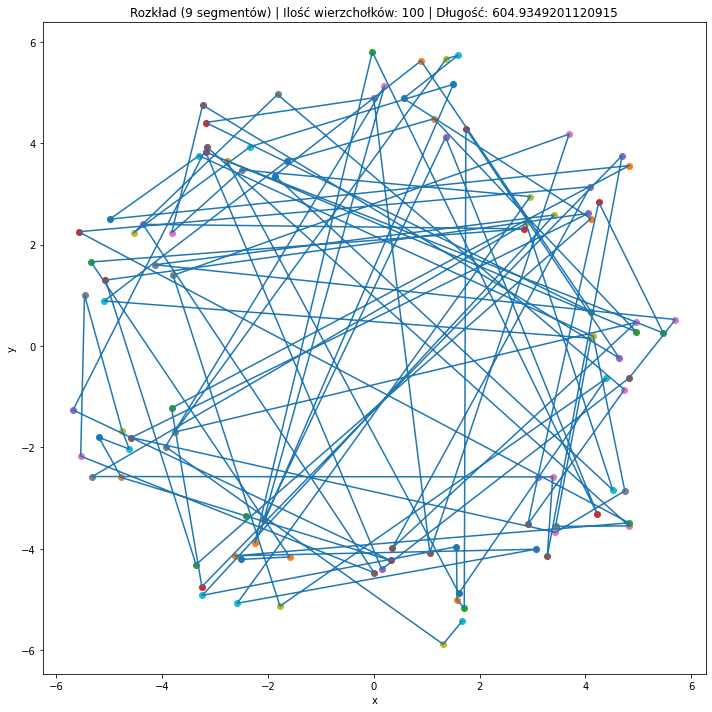

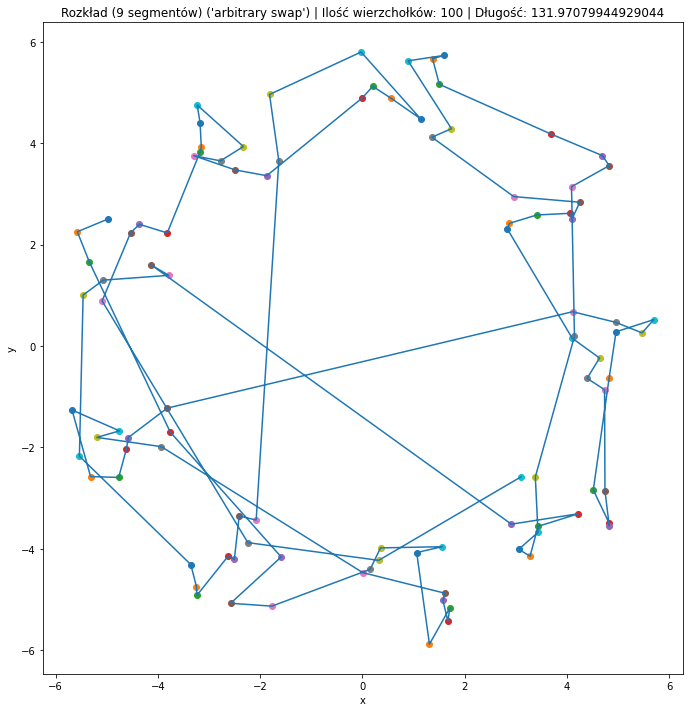

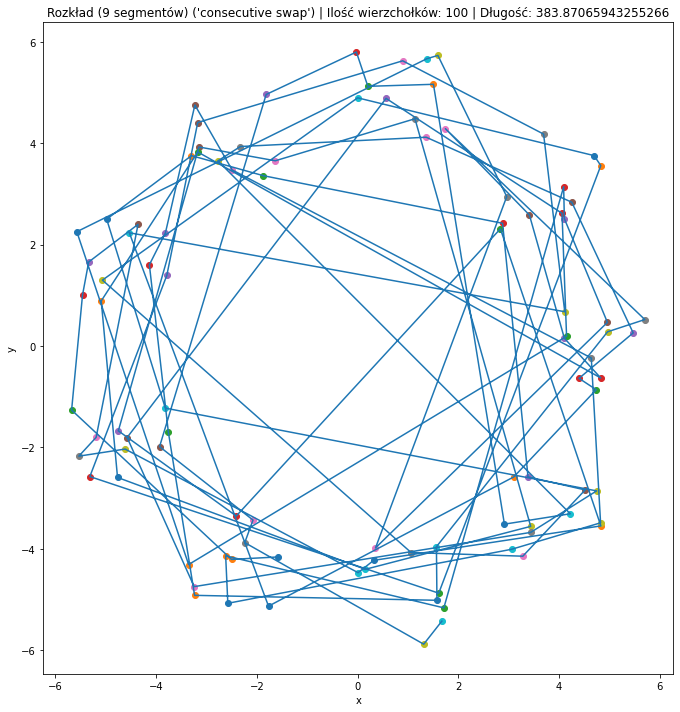

In [31]:
temp_rozklad = "Rozkład (9 segmentów)"

chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


Wyniki nie są do końca zadowalające. W przypadku rozkładu z podziałem na 9 zdarza się, że "krótsza ścieżka" jest dłuższa od tej pierwszej! (z racji losowosego wybierania punktów, nie zdarza się to za każdym razem)

Temperatura jednak była ustawiona na 5230.

Wykonam testy ponownie, dla zmniejszonej wartości początkowej temperatury.

In [32]:
T_1 = 52

#### Rozkład jednostajny

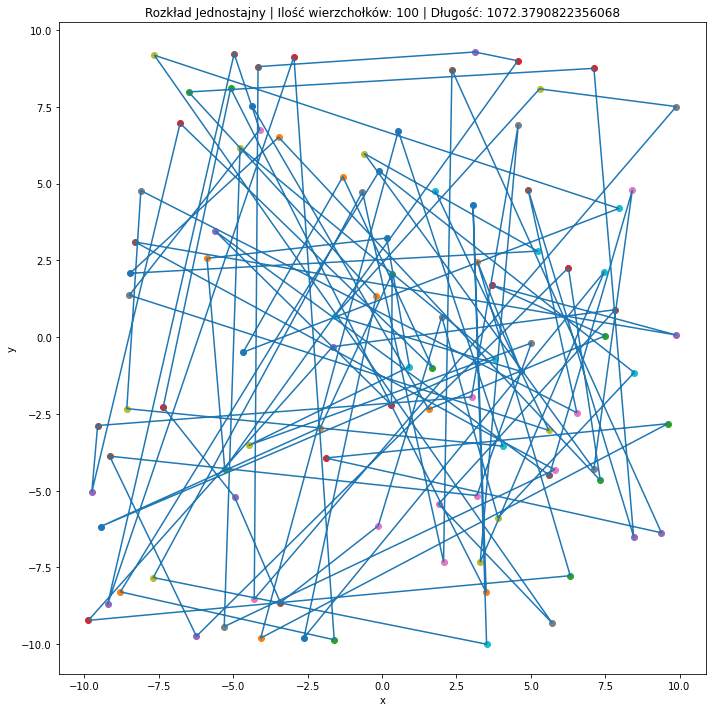

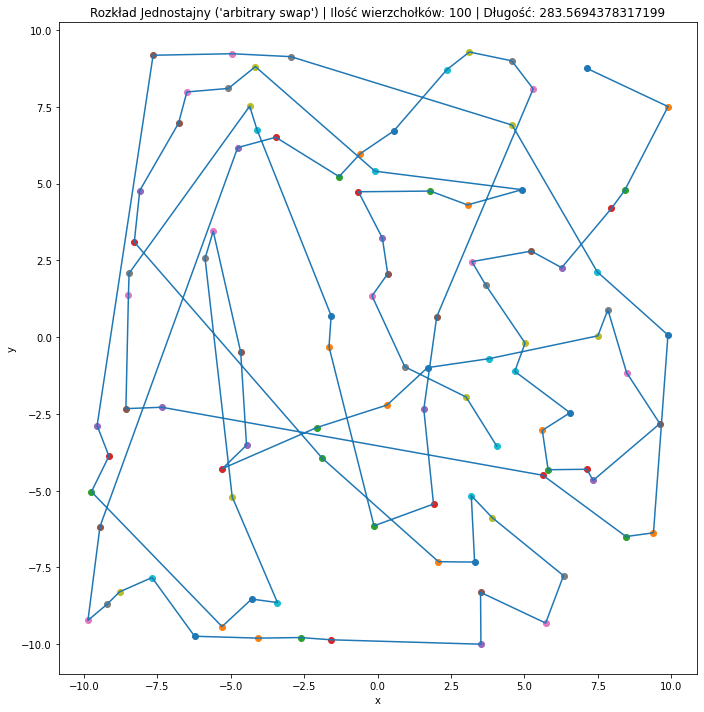

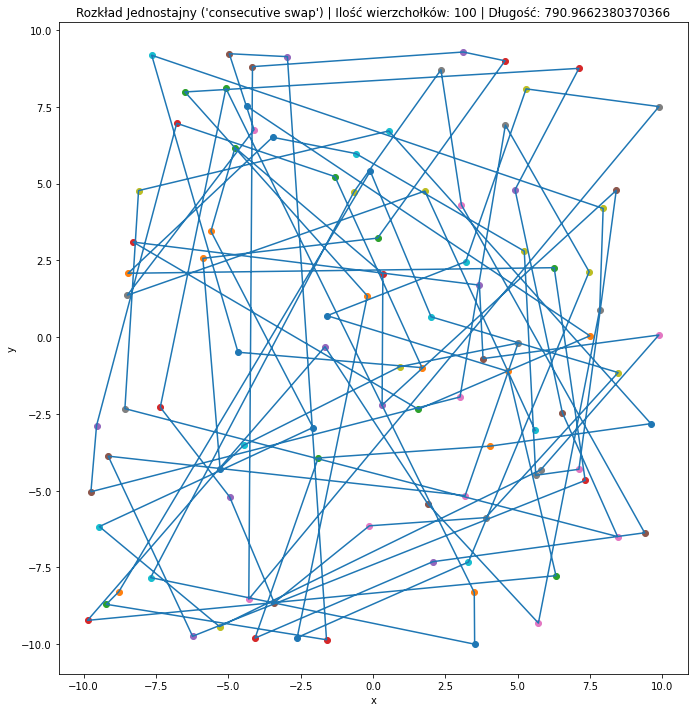

In [33]:
temp_rozklad = "Rozkład Jednostajny"

chmura = stworz_chmure("rozklad_jednostajny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład normalny

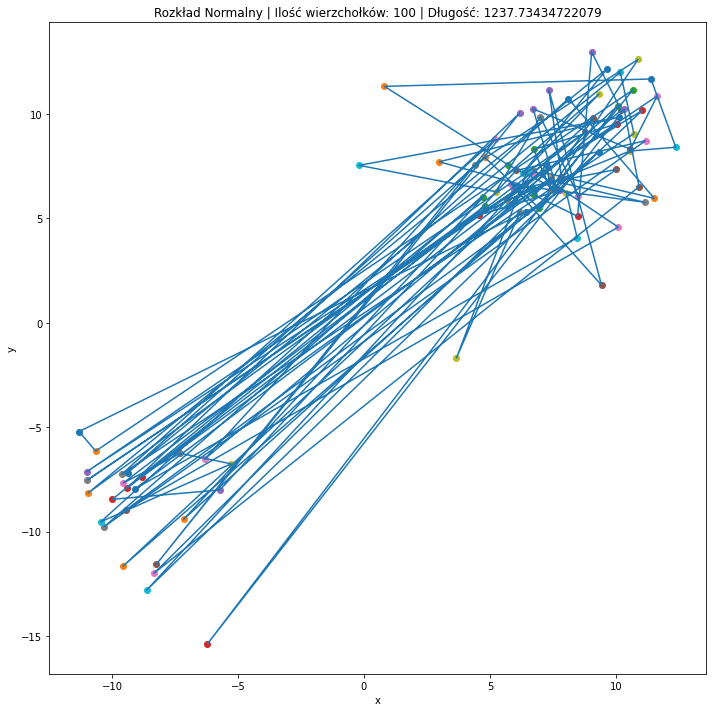

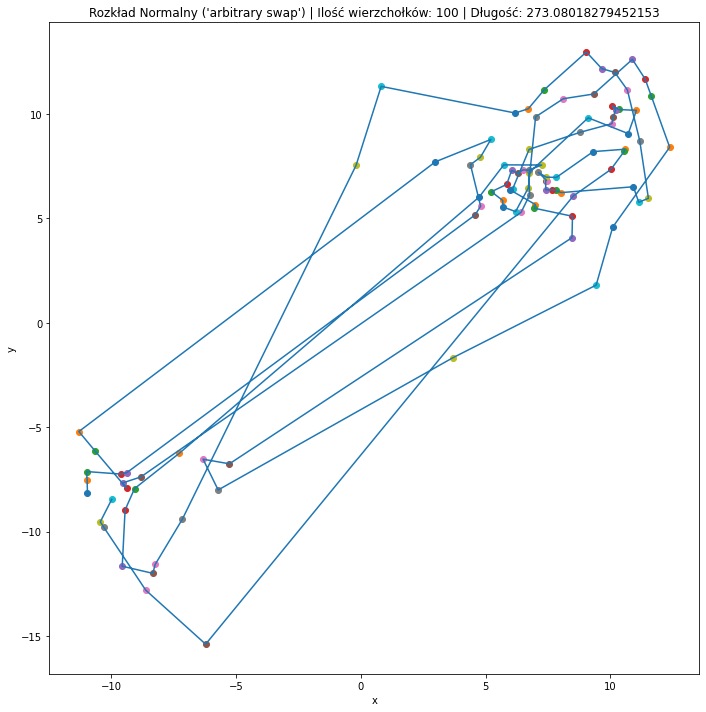

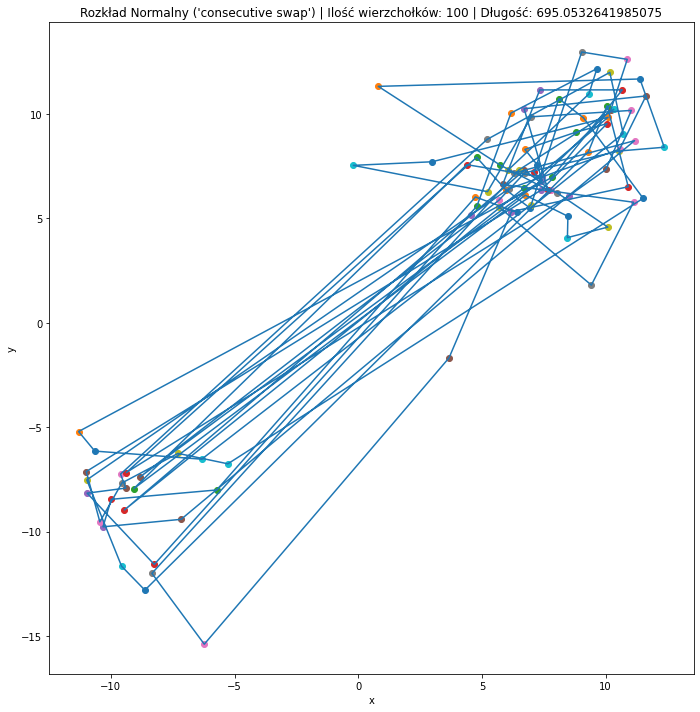

In [34]:
temp_rozklad = "Rozkład Normalny"

chmura = stworz_chmure("rozklad_normalny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład z podziałem na 9 segmentów

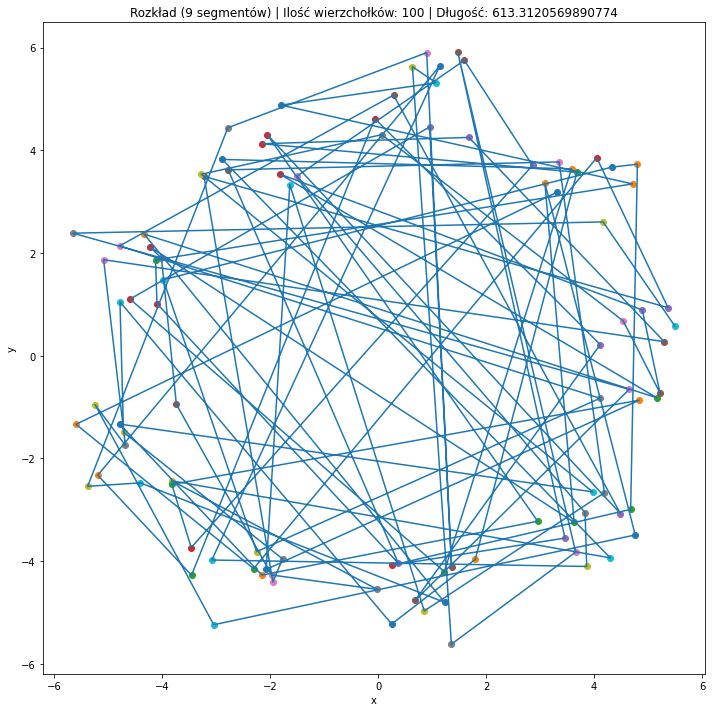

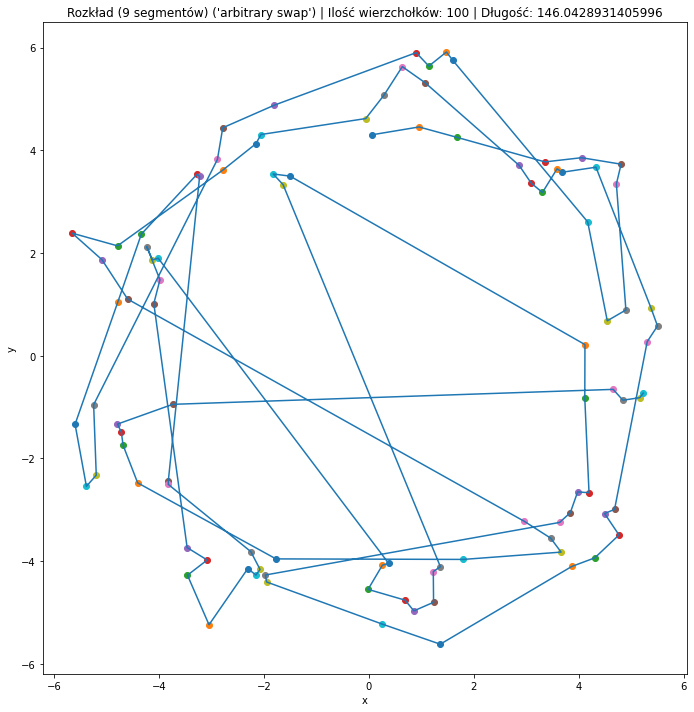

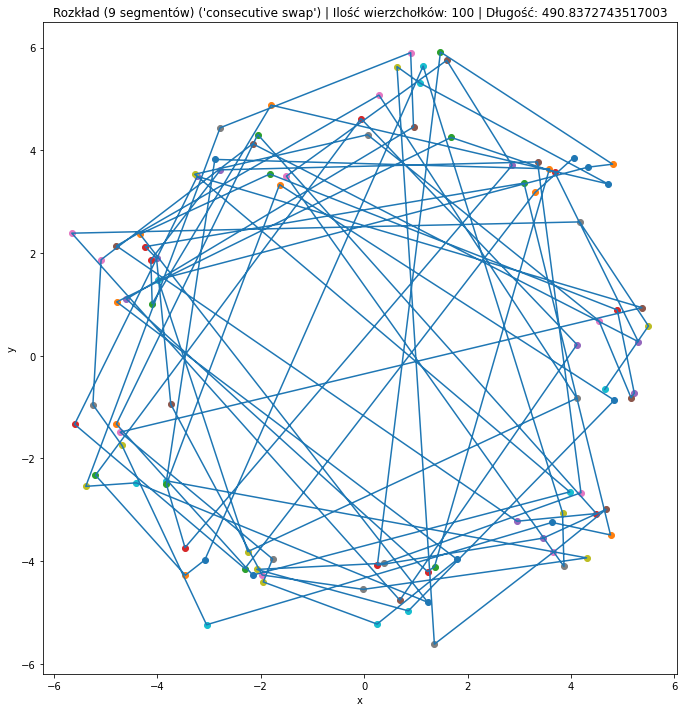

In [35]:
temp_rozklad = "Rozkład (9 segmentów)"

chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


Te wyniki dla niższej temperatury są już dużo bardziej zadowalające.

Powodem takiej zmiany jest fakt, że funkcja prawdopodobieństwa w dużej mierze zależy od podanej temperatury.
Im wolniej zmienia się temperatura, tym większa szansa, że znalezione rozwiązanie będzie optymalne.
(źródło: Wikipedia - [link](https://en.wikipedia.org/wiki/Simulated_annealing#The_annealing_schedule)).

<br>

W kwestii `arbitrary_swap` vs `consecutive_swap` - w moich testach zawsze ten pierwszy zdawał się dawać lepsze rezultaty.

Ten drugi ma potencjał w sytuacjach takich jak podział na 9 segmentów,
gdzie losowe dobieranie dwóch miast, które najprawdopodobniej są mocno od siebie oddalone bardzo rzadko skutkować będzie polepszeniem stanu.

Dla 100 wierzchołków nie jest lepszy, ale dla większej ilości spodziewam się czego innego:

In [36]:
temp_w = 1000
temp_k = 25000

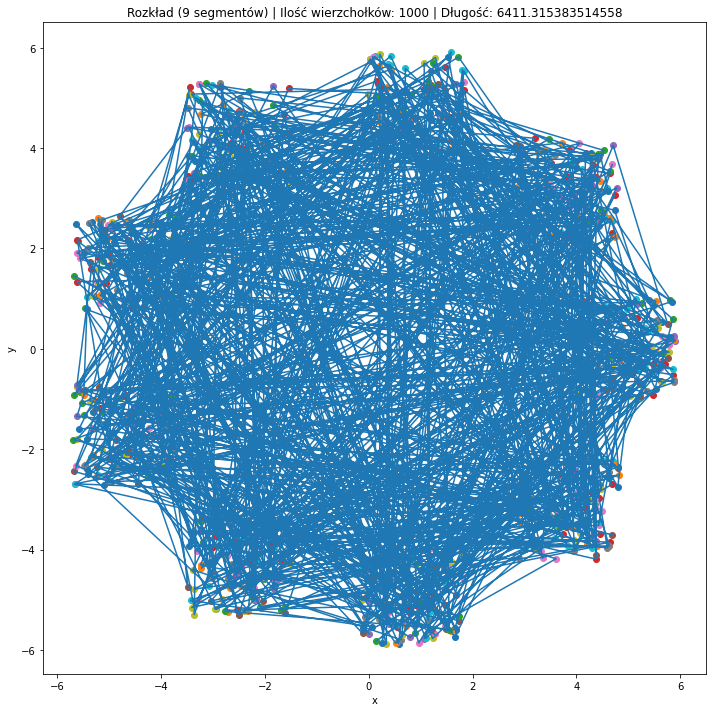

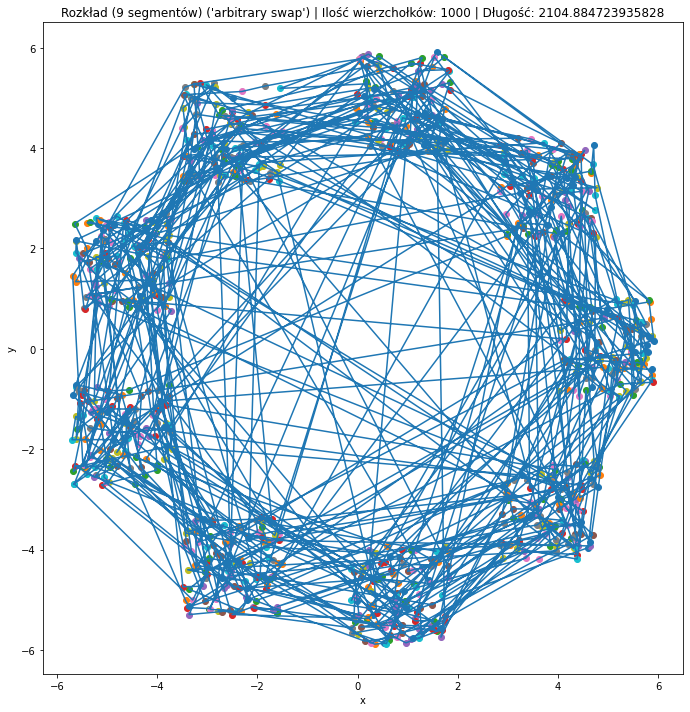

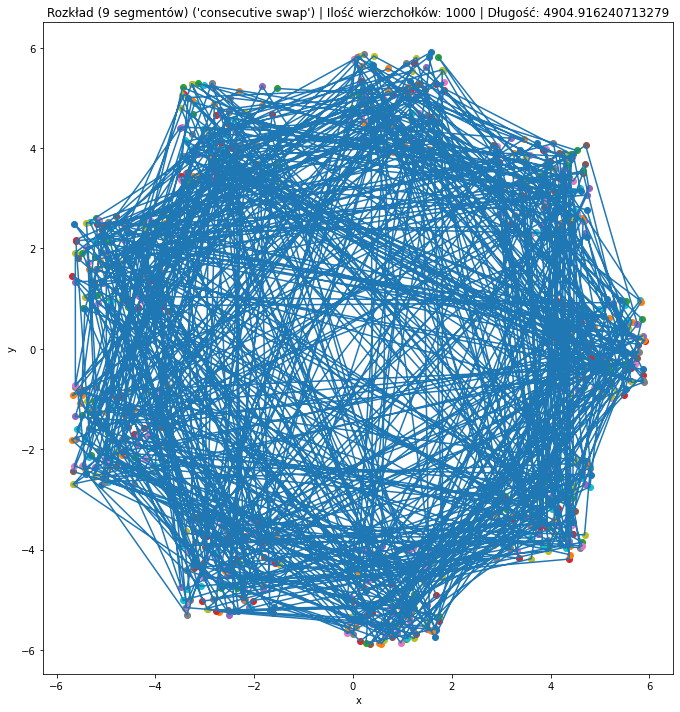

In [37]:
temp_rozklad = "Rozkład (9 segmentów)"

chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))

Sytuacja nie zmieniła się.
Moim zdaniem połączenie `arbitrary swap` i `consecutive swap`:

` losuj dwa punkty, ale nie bardzo daleko oddalone od siebie  `

działałoby tutaj lepiej.
___

"Przedstaw wizualizację działania procedury minimalizującej funkcję celu (funkcja przekazana do metody dual_annealing może modyfikować zewnętrzny stan)"

Do tego wykorzystam `matplotlib.animation`.

Aby zachować ciągłość temperatury pomiędzy wywołaniami, muszę zmodyfikować funkcję `simulatedAnnealing`.

In [38]:
def simulatedAnnealing(startowa_sciezka, zmiana="arbitrary swap", k_max=1000, k_startowe=0):
    obecny_stan = startowa_sciezka

    for k in range(k_startowe, k_max + k_startowe):     ## << tu zmiana <<
        stan_iteracji = obecny_stan.copy()
        T = temperatura( k+1 )

        if zmiana=="arbitrary swap":
            indeks_pierwszego_miasta = np.random.randint(0, len(startowa_sciezka))

            indeks_drugiego_miasta = indeks_pierwszego_miasta
            while(indeks_drugiego_miasta == indeks_pierwszego_miasta):
                indeks_drugiego_miasta = np.random.randint(0, len(startowa_sciezka))

            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]


        elif zmiana=="consecutive swap":
            indeks_pierwszego_miasta = np.random.randint(1, len(startowa_sciezka) - 1)

            if(np.random.uniform(0.0,1.0,1) >= 0.5):
                indeks_drugiego_miasta = indeks_pierwszego_miasta + 1
            else:
                indeks_drugiego_miasta = indeks_pierwszego_miasta - 1

            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]

        if P(energia_stanu(obecny_stan), energia_stanu(stan_iteracji), T) >= np.random.uniform(0.0, 1.0, 1):
            obecny_stan = stan_iteracji

    return obecny_stan

In [39]:
import matplotlib.animation as animation
from pylab import *
from IPython.display import Video

In [40]:
def wizualizuj(frames=60, skala=2, fps=10, nazwa_pliku="demo1.mp4"):

    chmura_do_wizualizacji = stworz_chmure("rozklad_jednostajny", 100)

    fig1, (axis, axis2) = plt.subplots(2, 1, figsize=(10,10), gridspec_kw={'height_ratios': [8, 2]})
    for punkt in chmura_do_wizualizacji:
        axis.scatter(punkt[0], punkt[1])

    temp_chmura = np.array( chmura_do_wizualizacji.copy() )
    linie, = axis.plot(temp_chmura[:,0], temp_chmura[:,1])

    mierzone_dlugosci = []
    iteracje = []

    linie2, = axis2.plot(iteracje, mierzone_dlugosci)
    lista_linii = [linie, linie2]

    obecne_k = [0]

    def animate(frames2, chmura_do_wizualizacji, k_temp):
        k_start = k_temp[0]
        nowa_chmura_do_wizualizacji = simulatedAnnealing(chmura_do_wizualizacji, zmiana="arbitrary swap", k_max=skala, k_startowe=k_start)
        for i in range(len(chmura_do_wizualizacji)):
            chmura_do_wizualizacji[i] = nowa_chmura_do_wizualizacji[i]
        k_temp[0] += skala

        axis.set_title("Rozkład Jednostajny | Wierzchołki: 100 | Długość: " + str(round(energia_stanu(nowa_chmura_do_wizualizacji), 2)))
        axis.set_xlabel("x")
        axis.set_ylabel("y")

        axis.set_xlim(-10,10)
        axis.set_ylim(-10,10)

        mierzone_dlugosci.append(round(energia_stanu(nowa_chmura_do_wizualizacji), 2))
        iteracje.append(k_temp[0])

        axis2.set_title("Długość ścieżki względem iteracji")
        axis2.set_xlabel("Iteracja")
        axis2.set_ylabel("Długość")
        axis2.set_xlim(0, frames*skala)
        axis2.set_ylim(0, mierzone_dlugosci[0]*1.1)

        lista_linii[1].set_data(iteracje, mierzone_dlugosci)
        #axis2.clear()
        #axis2.plot(iteracje, mierzone_dlugosci, "#1768AC")

        temp_chmura = np.array( nowa_chmura_do_wizualizacji.copy() )
        lista_linii[0].set_data(temp_chmura[:,0], temp_chmura[:,1])
        return lista_linii,

    ani = animation.FuncAnimation(fig1, animate, frames, fargs=[chmura_do_wizualizacji, obecne_k], interval=30)
    writer = animation.writers['ffmpeg'](fps=fps)
    ani.save(nazwa_pliku, writer=writer)

Powyższa funkcja powinna wygenerować plik *.mp4 w folderze wykonującym.

Wcześniejsze `k_max` to odpowiednik `frames * skala`.

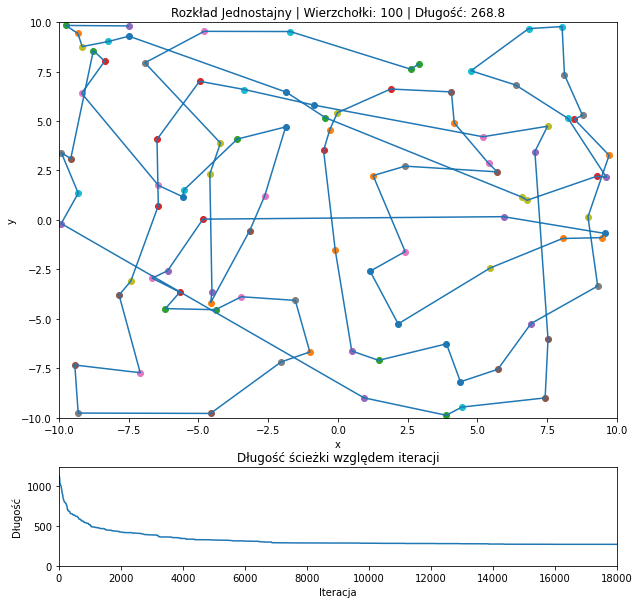

In [41]:
wizualizuj(frames=1800, skala=10, fps=60)

In [42]:
Video("demo1.mp4")

Widzimy, że przez "losowość" funkcji prawdopodobieństwa często zmieniamy "dobre" rozwiązanie na gorsze.
___
Mogę ustawić program tak, żeby akceptował jedynie lepsze rozwiązania: (zmiana w porównaniu $P(e, e', T)$)

In [43]:
def simulatedAnnealing(startowa_sciezka, zmiana="arbitrary swap", k_max=1000, k_startowe=0):
    obecny_stan = startowa_sciezka

    for k in range(k_startowe, k_max + k_startowe):
        stan_iteracji = obecny_stan.copy()
        T = temperatura( k+1 )

        if zmiana=="arbitrary swap":
            indeks_pierwszego_miasta = np.random.randint(0, len(startowa_sciezka))

            indeks_drugiego_miasta = indeks_pierwszego_miasta
            while(indeks_drugiego_miasta == indeks_pierwszego_miasta):
                indeks_drugiego_miasta = np.random.randint(0, len(startowa_sciezka))

            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]


        elif zmiana=="consecutive swap":
            indeks_pierwszego_miasta = np.random.randint(1, len(startowa_sciezka) - 1)

            if(np.random.uniform(0.0,1.0,1) > 0.5):
                indeks_drugiego_miasta = indeks_pierwszego_miasta + 1
            else:
                indeks_drugiego_miasta = indeks_pierwszego_miasta - 1

            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]

        if P(energia_stanu(obecny_stan), energia_stanu(stan_iteracji), T) >= 1:     ## << zmiana tutaj <<
            obecny_stan = stan_iteracji

    return obecny_stan

Pokażę teraz wizualizację po zmianie:

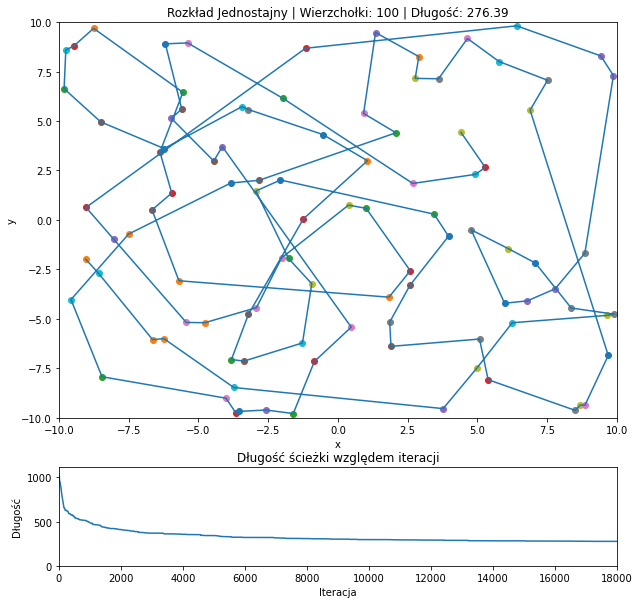

In [44]:
wizualizuj(frames=1800, skala=10, fps=60, nazwa_pliku="demo2.mp4")

In [45]:
Video("demo2.mp4")

Sam wybór tego parametru w tym porównaniu jest dość problematyczny - w zależności od zadania różne wartości dają różne rezultaty.

Generacja nowego stanu też może być przeprowadzona na wiele sposobów - tutaj wykonuję pojedynczą zamianę miast, ale mógłbym również wykonywać ich więcej.

___
Nie jest to część polecenia, ale przeprowadzę zmiany, które uważam, że mogą poprawić generacje.

In [46]:
def odleglosc_miast(lista, ind1, ind2):
    aa = (lista[ind1][0] - lista[ind2][0]) * (lista[ind1][0] - lista[ind2][0])
    bb = (lista[ind1][1] - lista[ind2][1]) * (lista[ind1][1] - lista[ind2][1])
    return np.sqrt( aa + bb )


def simulatedAnnealing(startowa_sciezka, zmiana="arbitrary swap", k_max=1000, k_startowe=0):
    obecny_stan = startowa_sciezka
    ilosc_zmian = 3     ##

    for k in range(k_startowe, k_max + k_startowe):
        stan_iteracji = obecny_stan.copy()
        T = temperatura( k+1 )

        if zmiana=="arbitrary swap":
            for i in range(ilosc_zmian):            ##
                indeks_pierwszego_miasta = np.random.randint(0, len(startowa_sciezka))

                indeks_drugiego_miasta = indeks_pierwszego_miasta
                dozwolona_odleglosc = 2.5
                while(indeks_drugiego_miasta == indeks_pierwszego_miasta or odleglosc_miast(stan_iteracji, indeks_pierwszego_miasta, indeks_drugiego_miasta) > dozwolona_odleglosc):
                    indeks_drugiego_miasta = np.random.randint(0, len(startowa_sciezka))
                    dozwolona_odleglosc += 0.1

                stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]


        elif zmiana=="consecutive swap":
            for i in range(ilosc_zmian):            ##
                indeks_pierwszego_miasta = np.random.randint(1, len(startowa_sciezka) - 1)

                if(np.random.uniform(0.0,1.0,1) > 0.5):
                    indeks_drugiego_miasta = indeks_pierwszego_miasta + 1
                else:
                    indeks_drugiego_miasta = indeks_pierwszego_miasta - 1

                stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]

        if P(energia_stanu(obecny_stan), energia_stanu(stan_iteracji), T) >= np.random.uniform(0.5, 1.0, 1):   ##
            obecny_stan = stan_iteracji

    return obecny_stan

In [47]:
T_1 = 10

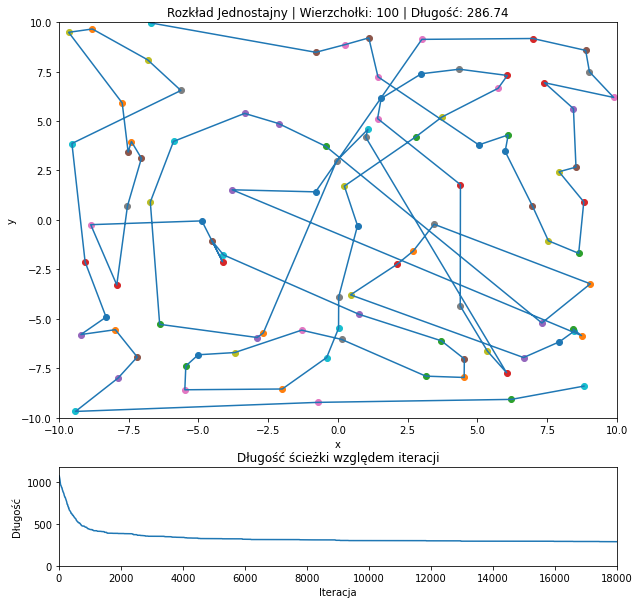

In [48]:
wizualizuj(frames=1800, skala=10, fps=60, nazwa_pliku="demo3.mp4")

In [49]:
Video("demo3.mp4")

